In [83]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [84]:
from value import Value
from graph import *

In [85]:

a = Value(2, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label = 'e'
d = e + c; d.label='d'
f = Value(data=-2.0, label='f')
L = f * d; L.label = 'L'

In [86]:
d._prev

{Value(data=-6.0 label=e), Value(data=10.0 label=c)}

In [87]:
d._op

'+'

In [88]:
nodes, edges = trace(d)
nodes

{Value(data=-3.0 label=b),
 Value(data=-6.0 label=e),
 Value(data=10.0 label=c),
 Value(data=2 label=a),
 Value(data=4.0 label=d)}

In [89]:
edges

{(Value(data=-3.0 label=b), Value(data=-6.0 label=e)),
 (Value(data=-6.0 label=e), Value(data=4.0 label=d)),
 (Value(data=10.0 label=c), Value(data=4.0 label=d)),
 (Value(data=2 label=a), Value(data=-6.0 label=e))}

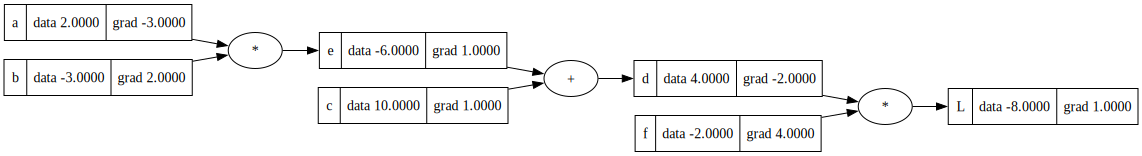

In [90]:
draw_dot(L)